In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from matplotlib import font_manager as fm
font_location = '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [5]:
df_raw = pd.read_csv('/home/pirl/빅데이터 프로젝트/raw data/MFG_TAT.csv', engine='python', encoding='EUC-KR')
df_raw.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
0,양품,LOT-101,PNL-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,2019-04-11 12:41,...,6447.0,530.0,76.0,333.0,88.0,396.0,86.0,7140.0,0.0,10074.0
1,양품,LOT-101,PNL-02,2019-04-01 0:45,2019-04-01 6:05,2019-04-01 11:45,2019-04-06 14:25,2019-04-11 4:25,2019-04-03 21:04,2019-04-11 13:25,...,6600.0,530.0,80.0,438.0,82.0,381.0,84.0,6956.0,0.0,10075.0
2,양품,LOT-101,PNL-03,2019-04-01 1:29,2019-04-01 6:49,2019-04-01 12:29,2019-04-06 15:09,2019-04-11 5:09,2019-04-03 21:48,2019-04-11 14:09,...,6597.0,530.0,80.0,420.0,92.0,396.0,86.0,6840.0,0.0,10645.0
3,양품,LOT-101,PNL-04,2019-04-01 2:13,2019-04-01 7:33,2019-04-01 13:13,2019-04-06 15:53,2019-04-11 5:53,2019-04-03 22:32,2019-04-11 14:53,...,6420.0,530.0,78.0,429.0,78.0,399.0,90.0,6720.0,0.0,10076.0
4,양품,LOT-101,PNL-05,2019-04-01 2:58,2019-04-01 8:18,2019-04-01 13:58,2019-04-06 16:38,2019-04-11 6:38,2019-04-03 23:17,2019-04-11 15:38,...,6453.0,540.0,76.0,363.0,82.0,393.0,84.0,7110.0,0.0,10074.0


In [6]:
a = df_raw.query('TAT_3BUS_1DEVELOP==36')
a

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,...,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
1341,명점,LOT-168,PNL-02,2019-05-12 6:07,2019-05-12 11:27,2019-05-12 17:07,2019-05-17 19:47,2019-05-22 9:47,2019-05-15 1:19,2019-05-22 18:47,...,NaN,820.0,78.0,387.0,78.0,399.0,78.0,6985.0,0.0,9749.0


# 히스토그램

In [8]:
def fun_plot_hist(data, var):
    plt.hist(data[data['JUDGE']=='양품'][var], label='양품', alpha=0.5)
    plt.hist(data[data['JUDGE']=='명점'][var], label='명점', alpha=0.5)
    plt.legend()

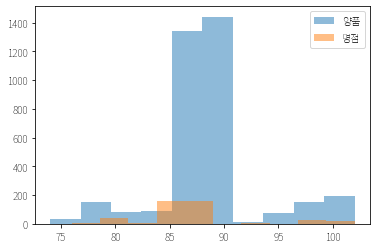

In [6]:
# BLACK 1인쇄 소요시간
fun_plot_hist(df_raw, 'TAT_1BLACK_1PRINT')

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


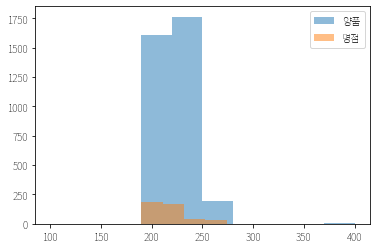

In [8]:
# BLACK 2RTD 소요시간

fun_plot_hist(df_raw, 'TAT_1BLACK_2RTD')

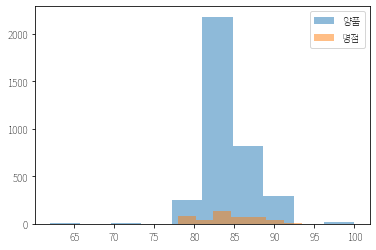

In [13]:
# AG 1인쇄 소요시간

fun_plot_hist(df_raw, 'TAT_2AG_1PRINT')

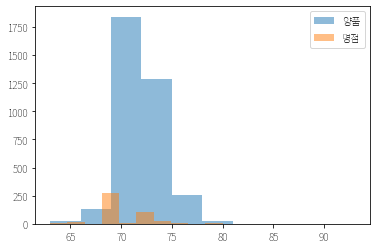

In [12]:
# AG 2RTD 소요시간
fun_plot_hist(df_raw, 'TAT_2AG_2RTD')

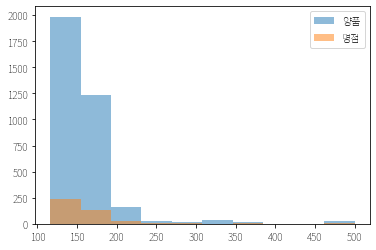

In [14]:
# AG 3노광 소요시간
fun_plot_hist(df_raw, 'TAT_2AG_3EXPOSURE')

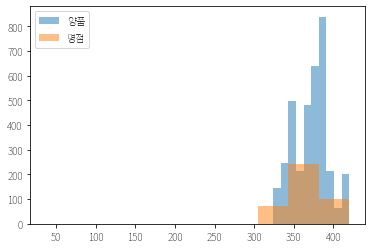

In [15]:

fun_plot_hist(df_raw, 'TAT_3BUS_1DEVELOP')

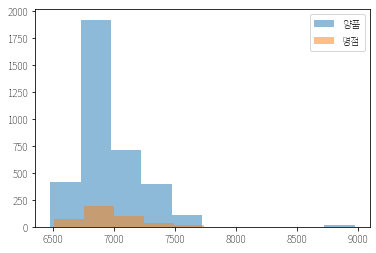

In [16]:

fun_plot_hist(df_raw, 'TAT_3BUS_2FIRE')

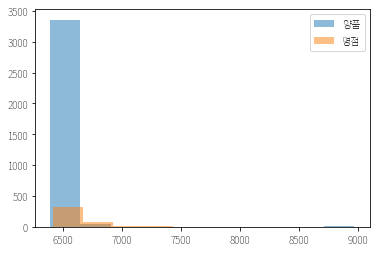

In [17]:

fun_plot_hist(df_raw, 'TAT_4DIELEC_FIRE')

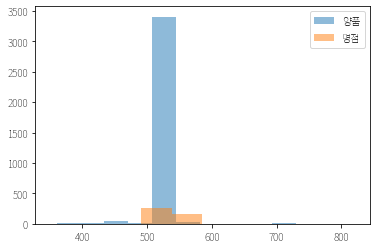

In [18]:

fun_plot_hist(df_raw, 'TAT_5MGO')

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


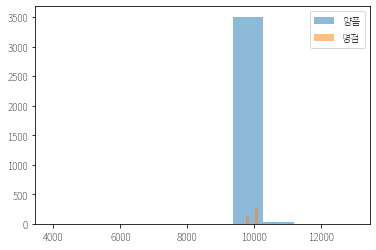

In [9]:

fun_plot_hist(df_raw, 'TAT_8AGING')

In [19]:
a = df_raw[['TAT_8AGING']]
a.describe()

,TAT_8AGING
count,3956.000000
mean,9975.342012
std,196.059891
min,3900.000000
25%,9750.000000
50%,10074.000000
75%,10076.000000
max,12999.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe90616e910>]],
      dtype=object)

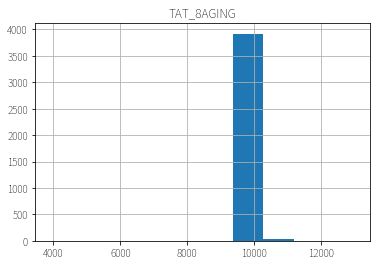

In [20]:
a.hist()

# 상관계수

In [23]:
df_raw.corr()

,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_7PASTE,TAT_8AGING
TAT_1BLACK_1PRINT,1.000000,-0.192185,0.386808,-0.014167,0.199576,-0.233715,0.022025,-0.054148,-0.058201,-0.034677,-0.033441,-0.054659,-0.030035,-0.081658,-0.025823,NaN,-0.028529
TAT_1BLACK_2RTD,-0.192185,1.000000,-0.173003,-0.049250,-0.056968,-0.045206,-0.065558,0.089797,-0.015713,0.042806,0.052077,0.044448,-0.060446,0.038211,-0.052569,NaN,0.004087
TAT_2AG_1PRINT,0.386808,-0.173003,1.000000,0.113474,0.189754,-0.197906,0.135466,-0.014140,-0.020483,-0.008648,-0.063777,-0.006955,-0.077093,-0.049971,0.053763,NaN,0.004163
TAT_2AG_2RTD,-0.014167,-0.049250,0.113474,1.000000,-0.065967,0.063530,0.026441,-0.049729,0.021265,-0.033560,-0.029630,0.030302,-0.035302,0.014978,0.002379,NaN,-0.019614
TAT_2AG_3EXPOSURE,0.199576,-0.056968,0.189754,-0.065967,1.000000,-0.196909,-0.047723,0.030302,-0.007711,0.032977,0.026136,0.018008,0.020284,-0.016596,-0.010497,NaN,0.000955
TAT_3BUS_1DEVELOP,-0.233715,-0.045206,-0.197906,0.063530,-0.196909,1.000000,0.034759,-0.087307,-0.069839,-0.110413,-0.096343,0.017946,0.068296,-0.018328,0.007169,NaN,0.007634
TAT_3BUS_2FIRE,0.022025,-0.065558,0.135466,0.026441,-0.047723,0.034759,1.000000,-0.049349,-0.024551,-0.087442,-0.138923,0.019535,-0.078969,-0.037469,0.274195,NaN,-0.007627
TAT_4DIELEC_FIRE,-0.054148,0.089797,-0.014140,-0.049729,0.030302,-0.087307,-0.049349,1.000000,0.008352,0.092258,0.038718,0.020769,-0.033209,-0.006248,-0.000429,NaN,0.000010
TAT_5MGO,-0.058201,-0.015713,-0.020483,0.021265,-0.007711,-0.069839,-0.024551,0.008352,1.000000,0.056906,0.022672,0.039233,0.079491,0.046709,0.006167,NaN,-0.033034
TAT_6PHOS_1R_1DISPENSER,-0.034677,0.042806,-0.008648,-0.033560,0.032977,-0.110413,-0.087442,0.092258,0.056906,1.000000,0.067733,0.534272,0.042942,0.721999,-0.084163,NaN,0.014381
